
This project will focus on conducting a text analysis of the famous novel, ‘Pride and Prejudice’ written by renowned writer, Jane Austen. With the aid of Natural Language Toolkit (NLTK) and TextBlob, the text will be analyzed to know the word that was mentioned frequently in the novel, the number of times the main character was mentioned. Also, a brief sentiment analysis will be carried out on the novel.



**Import the Importables**

In [3]:
#import nltk and download nltk packages

import nltk
from urllib import request
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist

**Load the Data from The Web**

In [2]:
#Get text "Oliver Twist" from Project Guntenberg - load the data 
#convert it to UFT8 
#Store converted result as variable text  

url = "https://www.gutenberg.org/cache/epub/69324/pg69324.txt"
response = request.urlopen(url)
text = response.read().decode('utf8')

In [4]:
len(text)

762944

**Data Preprocessing**

* Remove all Removables (Stopwords - Numbers, Punctuation Marks and Split Text by White Space
* Text Norminalization
* Tokenization
* Lemmatization

In [45]:
# remove punctuation marks from the text and assigned result to variable 'free_text'

punctuations = '''!()-[]{};:’'""\,<>.“”/?@#$%^&*_~'''

# remove punctuation from the string
free_text = ""
for char in text:
   if char not in punctuations:
       free_text = free_text+ char

In [46]:
#to remove numbers
clean_text = ''.join(c for c in free_text if not c.isdigit())

In [47]:
len(clean_text)

735114

In [48]:
# split into words by white space
words = clean_text.split()

In [49]:
# convert to lower case
words = [word.lower() for word in words]

In [50]:
#to perform tokenization on the text, convert the "words" which is a list to a string using list comprehension 

# using list comprehension 
words_str = ' '.join(map(str, words)) 

# to remove stopwords from the text 

stop_words = set(stopwords.words('english'))

word_tokens = word_tokenize(words_str)

filtered_text = [w for w in word_tokens if not w in stop_words]

filtered_text = []

for w in word_tokens:
    if w not in stop_words:
        filtered_text.append(w)

In [51]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [52]:
# to reduce the text to the root 
ps = PorterStemmer()
stemmed_words = []
for w in filtered_text: # using for loop to pass through the text to stem words
    stemmed_words.append(ps.stem(w))
    
wn = WordNetLemmatizer()
lemmed_words = []
for word in stemmed_words:
    lemmed_words.append(wn.lemmatize(word))

In [53]:
 nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

**Frequency Distribution of The Words in The Book**

In [54]:
#to know the frequency distribution of words in the text 

from nltk.probability import FreqDist
fdist = FreqDist(lemmed_words)
print(fdist)

<FreqDist with 4794 samples and 59426 outcomes>


**The frequent word and the number of times it was mentioned in the text**

In [55]:
#the frequent word and the number of times it was mentioned in the text

fdist.most_common(1)

[('mr', 1163)]

**The first ten frequent words mentioned in the text**

In [56]:
#to know the first ten frequent words mentioned in the text

fdist.most_common(10)

[('mr', 1163),
 ('elizabeth', 644),
 ('could', 532),
 ('would', 483),
 ('darci', 427),
 ('said', 405),
 ('bennet', 346),
 ('much', 338),
 ('must', 325),
 ('miss', 319)]

**Plotting frequencies on graph using matplotlib**

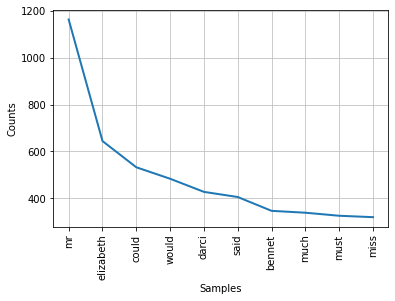

In [57]:
import matplotlib.pyplot as plt
fdist.plot(10,cumulative=False)
plt.show()

**Using wordcloud to show distribution of words in the text**

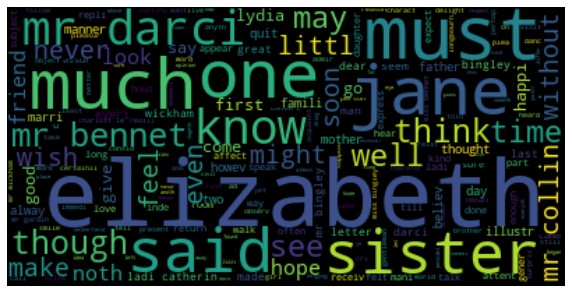

In [58]:

# for wordcloud representation, change list to string

lemmed_str = ' '.join([str(elem) for elem in lemmed_words]) 

from wordcloud import WordCloud
wordcloud = WordCloud().generate(lemmed_str)
#Dislay the generated image
plt.figure( figsize=(10,20))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

**Sentiment Analysis**

In [59]:
#sentiment analysis using textblob

#textblob wordcloud %pip install textblob
from textblob import TextBlob

blob = TextBlob(lemmed_str)

from textblob import TextBlob
print(format(blob.sentiment))


Sentiment(polarity=0.12003035030242284, subjectivity=0.4587555424298901)


In [62]:
#to know the type of sentiment in the text

from nltk.sentiment.vader import SentimentIntensityAnalyzer

def sentiment_analyse(sentiment_text):
    score = SentimentIntensityAnalyzer().polarity_scores(sentiment_text)
    if score['neg'] > score['pos']:
        print("Negative Sentiment")
    elif score['neg'] < score['pos']:
        print("Positive Sentiment")
    else:
        print("Neutral Sentiment")

sentiment_analyse(lemmed_str)

Positive Sentiment
